In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./housing.csv")

In [5]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Text(0, 0.5, 'House Value')

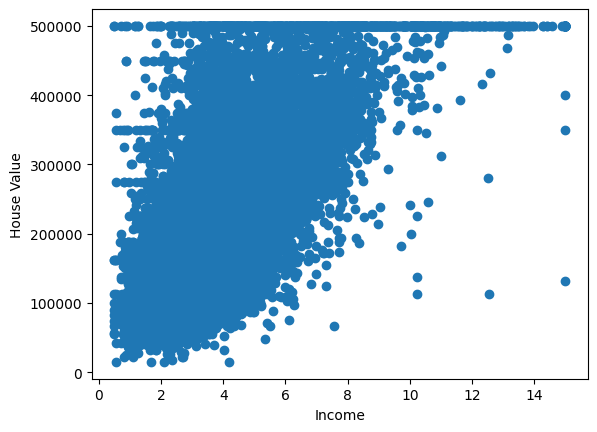

In [24]:
income = df["median_income"]
houseValue = df["median_house_value"]
plt.scatter(income,houseValue)
plt.xlabel('Income')
plt.ylabel('House Value')

In [25]:
incomeNp = income.to_numpy()
houseValueNp = houseValue.to_numpy()
mask = ~np.isnan(houseValue)

incomeNp = incomeNp[mask]
houseValueNp = houseValueNp[mask]
incomeNp.shape, houseValueNp.shape

((20640,), (20640,))

In [28]:
from sklearn.linear_model import LinearRegression

skLearn_model = LinearRegression().fit(incomeNp.reshape((20640,1)),houseValueNp) # training
sklearn_house_value_pred = skLearn_model.predict(incomeNp.reshape((20640,1)))
sklearn_house_value_pred.shape

(20640,)

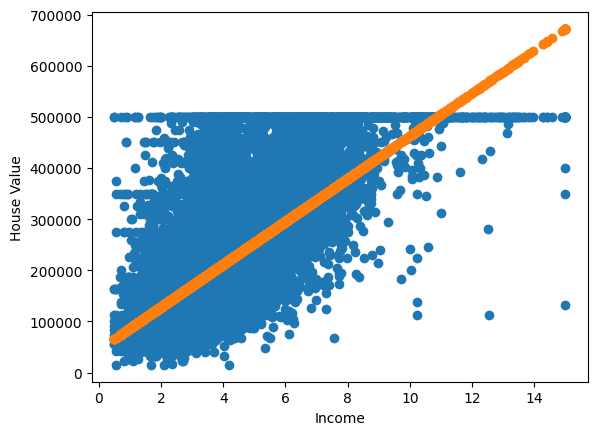

In [29]:
income = df["median_income"]
houseValue = df["median_house_value"]
plt.scatter(income,houseValue)
plt.xlabel('Income')
plt.ylabel('House Value')
plt.scatter(income,sklearn_house_value_pred)

In [34]:
predections_df = pd.DataFrame({
    'Income' : income,
    'HouseValue': houseValue,
    'SKlearn Bedroom Predections' : sklearn_house_value_pred,
    'Diff': sklearn_house_value_pred - houseValue
})
predections_df

,Income,HouseValue,SKlearn Bedroom Predections,Diff
0,8.3252,452600.0,393027.730079,-59572.269921
1,8.3014,358500.0,392033.036468,33533.036468
2,7.2574,352100.0,348400.257901,-3699.742099
3,5.6431,341300.0,280932.447134,-60367.552866
4,3.8462,342200.0,205833.079504,-136366.920496
...,...,...,...,...
20635,1.5603,78100.0,110296.519613,32196.519613
20636,2.5568,77100.0,151944.090343,74844.090343
20637,1.7000,92300.0,116135.120346,23835.120346
20638,1.8672,84700.0,123123.051933,38423.051933


In [35]:
# Assuming HouseValue[i] = intercept + (slope * Income[i]) + error y = c +mx+error
# Model :  y(hat)[i] = intercept(hat) +(slope(hat)) * x[i]

def getPredections(model,x):
    """
    obtain the predections for the given model here model is nothing but values of slope and intercept

    model {intercept : number , 'slope': number}
    x: np.array of float with shape(n,) of inputs
    returns : np.array of Floats with slope(n,)
    """

    intercept = model['intercept']
    slope = model['slope']

    return intercept + slope * x

In [53]:
# testing the getPredections function

testModel = {'intercept':1,'slope':1}
testX = np.array([1,2,3])
getPredections(testModel , testX)

array([2, 3, 4])

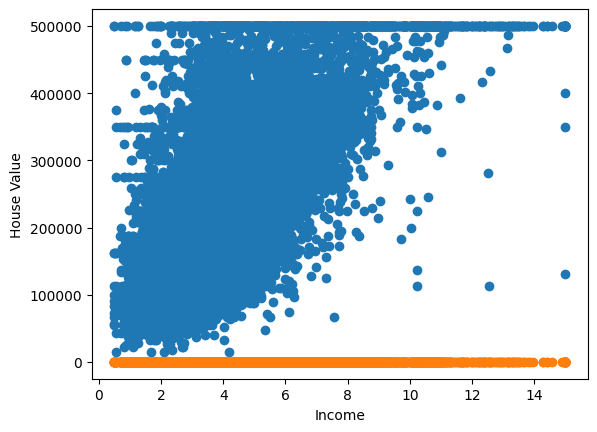

In [52]:
income = df["median_income"]
houseValue = df["median_house_value"]
plt.scatter(income,houseValue)
plt.xlabel('Income')
plt.ylabel('House Value')
plt.scatter(income,getPredections(testModel , income))

In [45]:
def meanSquaredError(y,yPredection):

    """
    Calcualtes the mean squared error given the observed and predecited o/p

    y: np.array of float with shape (y,) of observed values
    y_predectiosn: np.array() of floats with shape (n , ) of predectied o/p

    return :  float representing the MSE 
    """

    n = len(y)

    return np.sum(np.square(y - yPredection)) / n
    

In [46]:
def meanAbsoluteError(y,yPredection):

    """
    Calcualtes the mean absolute error given the observed and predecited o/p

    y: np.array of float with shape (y,) of observed values
    y_predectiosn: np.array() of floats with shape (n , ) of predectied o/p

    return :  float representing the MSE 
    """

    n = len(y)

    return np.sum(np.abs(y - y_predections)) / n
    

In [54]:
mse  = meanSquaredError(getPredections(testModel , income),income)
mse

1.0

In [55]:
mae  = meanAbsoluteError(getPredections(testModel , income),income)
mae

1.0

### Formuls to find intercept and slope
$\hat{\beta} = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2}$, $\hat{\alpha} = \bar{y} - \hat{\beta} \bar{x}$

In [51]:
def getBestModel(x,y):

    """
    Returns the model with parameters that minimizes the mse

    x: x cordinate value FLots with shspe (n,) of inputs
    y: y cordinate value FLots with shspe (n,) of inputs

    return {"slope": Flaot , "intercept": Float }
    """

    xBar = np.average(x)
    yBar = np.average(y)

    top = np.sum((x - xBar) * (y - yBar))
    bottom = np.sum((x - xBar) **2)

    intercept = top /bottom

    slope = yBar -  intercept * xBar
    

    model = {'slope': slope , "intercept" : intercept}

    return model

In [56]:
best_model = getBestModel(income, houseValue)
best_model

{'slope': 45085.576703268016, 'intercept': 41793.84920189626}

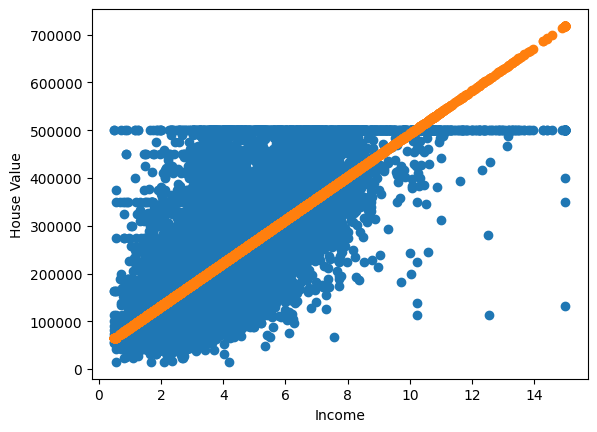

In [57]:
income = df["median_income"]
houseValue = df["median_house_value"]
plt.scatter(income,houseValue)
plt.xlabel('Income')
plt.ylabel('House Value')
plt.scatter(income,getPredections(best_model , income))